# SMV2rho: Tutorial 2

In this tutorial we will see how we can convert a velocity profile to density using Brocher's (2005) approach.

We will try out two ways of doing this.  First, we will use the class construct that we developed in `tutorial_1`, and secondly we will use a function to provide flexibility for various different uses.

First let's import the required modules from `SMV2rho`.

In [2]:
# import modules
from SMV2rho import plotting as smplt
from SMV2rho import density_functions as smd

## Class approach

### Load file

We can load in the test Vp velocity profile.  Since we are using the default file structure, we won't specify `seismic_method_name` or `region_name` this time.

In [4]:
# path to test velocity file
#  - this file comes with the distribution so there is no need to change this path
vp_file = "../TEST_DATA/EUROPE/Vp/RECEIVER_FUNCTION/DATA/M19_AQU_Vp.dat"

# load a profile into the Convert class
profile = smd.Convert(vp_file, profile_type = "Vp")

### Read data

Now read the data in the velocity profile file.

We can inspect the data dictionary that has been read from the input file by inspecting the `data` attribute.  Type
```
profile.data
```

In [7]:
# read data
profile.read_data()
profile.data

{'station': 'M19_AQU_Vp',
 'Vp_file': '../TEST_DATA/EUROPE/Vp/RECEIVER_FUNCTION/DATA/M19_AQU_Vp.dat',
 'region': None,
 'moho': 37.2,
 'location': array([13.48, 42.34]),
 'av_Vp': 6.617358544354839,
 'Vp': array([[  0.     ,   4.84865],
        [ -2.5    ,   4.84865],
        [ -2.51   ,   7.23144],
        [-16.2    ,   7.23144],
        [-16.21   ,   6.42768],
        [-37.2    ,   6.42768]]),
 'type': 'Vp',
 'method': 'EUROPE',
 'geotherm': None}

### Convert profile

Now we can convert the profile using the `Vp_to_density_brocher` method and inspect the updated data dictionary.

We can inspect the updated data dictionary by inspecting the `data` attribute by typing
```
profile.data
```

Notice that the `'rho'` and `'av_rho'` fields have been populated.

In [9]:
# xonvert Vp profile using 
profile.Vp_to_density_brocher()
# show data diictionary
profile.data

{'station': 'M19_AQU_Vp',
 'Vp_file': '../TEST_DATA/EUROPE/Vp/RECEIVER_FUNCTION/DATA/M19_AQU_Vp.dat',
 'region': None,
 'moho': 37.2,
 'location': array([13.48, 42.34]),
 'av_Vp': 6.617358544354839,
 'Vp': array([[  0.     ,   4.84865],
        [ -2.5    ,   4.84865],
        [ -2.51   ,   7.23144],
        [-16.2    ,   7.23144],
        [-16.21   ,   6.42768],
        [-37.2    ,   6.42768]]),
 'type': 'Vp',
 'method': 'EUROPE',
 'geotherm': None,
 'rho': array([[  0.        ,   2.5119241 ],
        [ -2.5       ,   2.5119241 ],
        [ -2.51      ,   3.03672643],
        [-16.2       ,   3.03672643],
        [-16.21      ,   2.81506916],
        [-37.2       ,   2.81506916]]),
 'av_rho': 2.8762876075085257}

### Plotting

We can plot this `'rho'` profile using some of the routines in the `plotting` module.

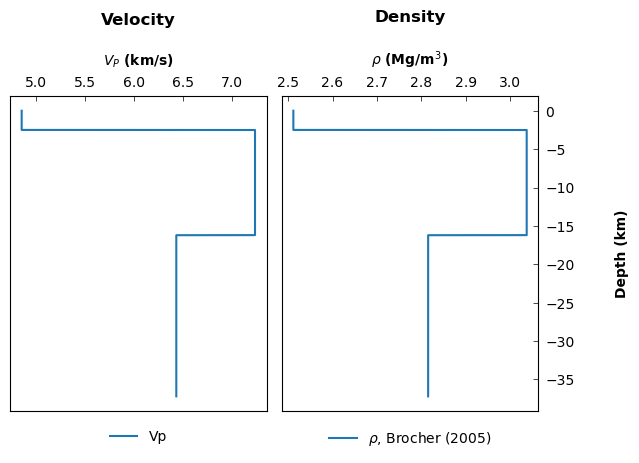

In [10]:
# organise data for pltting
data1 = [{'x': profile.data["Vp"][:,1], 
          'y': profile.data["Vp"][:,0],
          'label': "Vp"}]

data2 = [{'x': profile.data["rho"][:,1], 
          'y': profile.data["rho"][:,0],
          'label': r'$\rho$, Brocher (2005)'}]

# Call the plot_panels function
smplt.plot_panels([data1, data2], plot_type='line', 
            cmap=None, titles=['Velocity', 'Density'], 
            xlabels=[r'${V_P}$ (km/s)', r'$\rho$ (Mg/m${^3}$)'], 
            ylabels=['Depth (km)', 'Depth (km)'],
            z_values=None, figure_scale=0.8, 
            save_path=None)

## Function approach

Alternatively, if we prefer to work with functions rather than classes, then we can convert the velocity profile using a wrapper function.  In this case, everything is calculated and the appropriate classes and functions are called in the backend so that the user doesn't have to run individual methods.  This approach reduces flexibility but makes it possible to convert the profile into density with a one-liner.  This function also becomes useful later on if we want to convert multiple profiles at once and builds flexibility into the distriubution.

First let's take a look at the docstring for the `convert_V_profile` function.

In [13]:
smd.convert_V_profile?

Signature:
smd.convert_V_profile(
    file,
    profile_type,
    write_data=False,
    path=None,
    approach='stephenson',
    location=None,
    parameters=None,
    constant_depth=None,
    constant_density=None,
    T_dependence=False,
    geotherm=None,
    print_working_file=False,
)
Docstring:
Convert a single Vp or Vs velocity profile to a density profile.

Args:
    file (str): Path to the input velocity profile file.
    profile_type (str): Type of velocity profile, 'Vp' or 'Vs'.
    write_data (bool, optional): If True, writes the converted data to 
        files. Default is False.
    path (str, optional): Path to write the results. Default is None.
    approach (str, optional): Density conversion scheme to use, "brocher" 
        or "stephenson". Default is "stephenson".
    location (str, optional): Regional location of the profile. 
        Default is None.
    parameters (np.ndarray, optional): Instance of the Constants, 
        VpConstants or VsConstants classes.  M

Now we can use it to convert our velocity profile using Brocher's (2005) approach (i.e. the _Nafe-Drake_ equation).  This time, we should see an output string telling us the path to the file that is being converted.  We can also print the output to check that the result is the same as before.

In [15]:
# call density conversion function
# note that using profile_type="Vs" first calls a function to convert to Vp
# as is required by Brocher's (2005) approach.
profile_brocher = smd.convert_V_profile(vp_file, 
                            profile_type="Vp", 
                            approach="brocher",
                            print_working_file = True)

# print output dictionary to check values
profile_brocher

working on ../TEST_DATA/EUROPE/Vp/RECEIVER_FUNCTION/DATA/M19_AQU_Vp.dat


{'station': 'M19_AQU_Vp',
 'Vp_file': '../TEST_DATA/EUROPE/Vp/RECEIVER_FUNCTION/DATA/M19_AQU_Vp.dat',
 'region': None,
 'moho': 37.2,
 'location': array([13.48, 42.34]),
 'av_Vp': 6.617358544354839,
 'Vp': array([[  0.     ,   4.84865],
        [ -2.5    ,   4.84865],
        [ -2.51   ,   7.23144],
        [-16.2    ,   7.23144],
        [-16.21   ,   6.42768],
        [-37.2    ,   6.42768]]),
 'type': 'Vp',
 'method': 'EUROPE',
 'geotherm': None,
 'rho': array([[  0.        ,   2.5119241 ],
        [ -2.5       ,   2.5119241 ],
        [ -2.51      ,   3.03672643],
        [-16.2       ,   3.03672643],
        [-16.21      ,   2.81506916],
        [-37.2       ,   2.81506916]]),
 'av_rho': 2.8762876075085257}

### Plotting

We can plot up the result to check it is the same as before

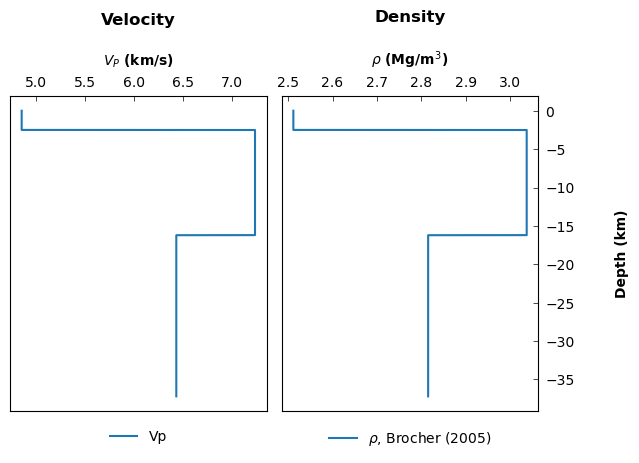

In [16]:
# organise data for pltting
data1 = [{'x': profile_brocher["Vp"][:,1], 
          'y': profile_brocher["Vp"][:,0],
          'label': "Vp"}]

data2 = [{'x': profile_brocher["rho"][:,1], 
          'y': profile_brocher["rho"][:,0],
          'label': r'$\rho$, Brocher (2005)'}]

# Call the plot_panels function
smplt.plot_panels([data1, data2], plot_type='line', 
            cmap=None, titles=['Velocity', 'Density'], 
            xlabels=[r'${V_P}$ (km/s)', r'$\rho$ (Mg/m${^3}$)'], 
            ylabels=['Depth (km)', 'Depth (km)'],
            z_values=None, figure_scale=0.8, 
            save_path=None)

### Converting a $V_S$ file

Converting a $V_S$ file requires an extra step because the _Nafe-Drake_ approach only provides a $V_P$-to-density conversion.  We therefore first need to convert the profile into $V_P$ and then into density.

In [22]:
vp_file = "../TEST_DATA/EUROPE/Vs/RECEIVER_FUNCTION/DATA/M19_AQU_Vs.dat"

# load a profile into the Convert class
profile_vs = smd.Convert(vp_file, profile_type = "Vs")
profile_vs.read_data()

Now try and run the next cell to convert the profile into density.  We can immediately see that we are trying to convert a $V_S$ profile into density using an approach that is supposed to work only for $V_P$ profiles.

To prevent this type of mistake, the program will throw a `NameError` because we have not yet generated a calculated $V_P$ profile to convert into density.

In [24]:
profile_vs.Vp_to_density_brocher()

NameError: You haven't created a Vp array yet! Convert Vs to Vp first!

We must first generate a calculated $V_P$ profile using Brocher's (2005) polynomial fit.

If we then print the data dictionary we can see that there is now a `'Vp_calc'` entry and an `'av_Vp_calc'` array.

In [41]:
profile_vs.Vs_to_Vp_brocher()
profile_vs.Vp_to_density_brocher()
profile_vs.data

{'station': 'M19_AQU_Vs',
 'Vs_file': '../TEST_DATA/EUROPE/Vs/RECEIVER_FUNCTION/DATA/M19_AQU_Vs.dat',
 'region': None,
 'moho': 37.2,
 'location': array([13.48, 42.34]),
 'av_Vs': 3.2977979690860213,
 'Vs': array([[  0.     ,   2.19945],
        [ -2.5    ,   2.19945],
        [ -2.51   ,   3.45455],
        [-16.2    ,   3.45455],
        [-16.21   ,   3.32656],
        [-37.2    ,   3.32656]]),
 'type': 'Vs',
 'method': 'EUROPE',
 'geotherm': None,
 'Vp_calc': array([[  0.        ,   3.84569101],
        [ -2.5       ,   3.84569101],
        [ -2.51      ,   5.87049279],
        [-16.2       ,   5.87049279],
        [-16.21      ,   5.63121299],
        [-37.2       ,   5.63121299]]),
 'av_Vp_calc': 5.59910010709708,
 'Vp_calc_Vs': 1.6978299336659668,
 'rho': array([[  0.        ,   2.37138868],
        [ -2.5       ,   2.37138868],
        [ -2.51      ,   2.68947595],
        [-16.2       ,   2.68947595],
        [-16.21      ,   2.6423109 ],
        [-37.2       ,   2.6423109 ]]),

Converting using the function approach described above can be achieved with a one-liner, where converting frm $V_s$ into $V_P$ is handled internally and automatically. 

In [40]:
# call density conversion function
# note that using profile_type="Vs" first calls a function to convert to Vp
# as is required by Brocher's (2005) approach.
profile_vs_brocher = smd.convert_V_profile(vp_file, 
                            profile_type="Vs", 
                            approach="brocher",
                            print_working_file = True)

# print output dictionary to check values
profile_vs_brocher

working on ../TEST_DATA/EUROPE/Vs/RECEIVER_FUNCTION/DATA/M19_AQU_Vs.dat


{'station': 'M19_AQU_Vs',
 'Vs_file': '../TEST_DATA/EUROPE/Vs/RECEIVER_FUNCTION/DATA/M19_AQU_Vs.dat',
 'region': None,
 'moho': 37.2,
 'location': array([13.48, 42.34]),
 'av_Vs': 3.2977979690860213,
 'Vs': array([[  0.     ,   2.19945],
        [ -2.5    ,   2.19945],
        [ -2.51   ,   3.45455],
        [-16.2    ,   3.45455],
        [-16.21   ,   3.32656],
        [-37.2    ,   3.32656]]),
 'type': 'Vs',
 'method': 'EUROPE',
 'geotherm': None,
 'Vp_calc': array([[  0.        ,   3.84569101],
        [ -2.5       ,   3.84569101],
        [ -2.51      ,   5.87049279],
        [-16.2       ,   5.87049279],
        [-16.21      ,   5.63121299],
        [-37.2       ,   5.63121299]]),
 'av_Vp_calc': 5.59910010709708,
 'Vp_calc_Vs': 1.6978299336659668,
 'rho': array([[  0.        ,   2.37138868],
        [ -2.5       ,   2.37138868],
        [ -2.51      ,   2.68947595],
        [-16.2       ,   2.68947595],
        [-16.21      ,   2.6423109 ],
        [-37.2       ,   2.6423109 ]]),

### Summary

We converted a $V_P$ and $V_S$ profile into density using Brocher's (2005) approach, which exploits the _Nafe-Drake_ relationship.  We saw how we can convert these profiles using either a class approach or with a wrapper function to increase flexibility for your needs.

Note that this profile returns quite dramatically different density profiles for the $V_S$ and $V_P$ approaches.  This difference may arise from local issues with either the imaging technique, assumed $V_P/V_S$ ratio, or local geology.  This degree of difference is relatively extreme, but does highlight the challenges in converting from seismic velocity to density and the inherent reliance on the accuracy of the underlying seismic velocity model and conversion scheme.